## SVM_Salarydata

In [ ]:
1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

### Import Libraries

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import Data

In [76]:
df=pd.read_csv('SalaryData_Test(1).csv')
df.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [77]:
df.shape

(15060, 14)

In [78]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### No Missing values

### EDA

C:\Users\rakes\AppData\Local\Temp\ipykernel_24632\3970111715.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

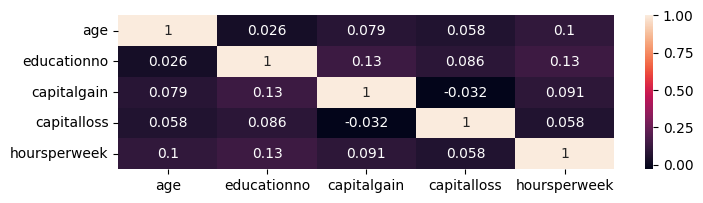

In [110]:
#Correlation graphics
plt.figure(figsize=(8,2))
sns.heatmap(df.corr(),annot=True)

#### There is no multicollinearity present among variables

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


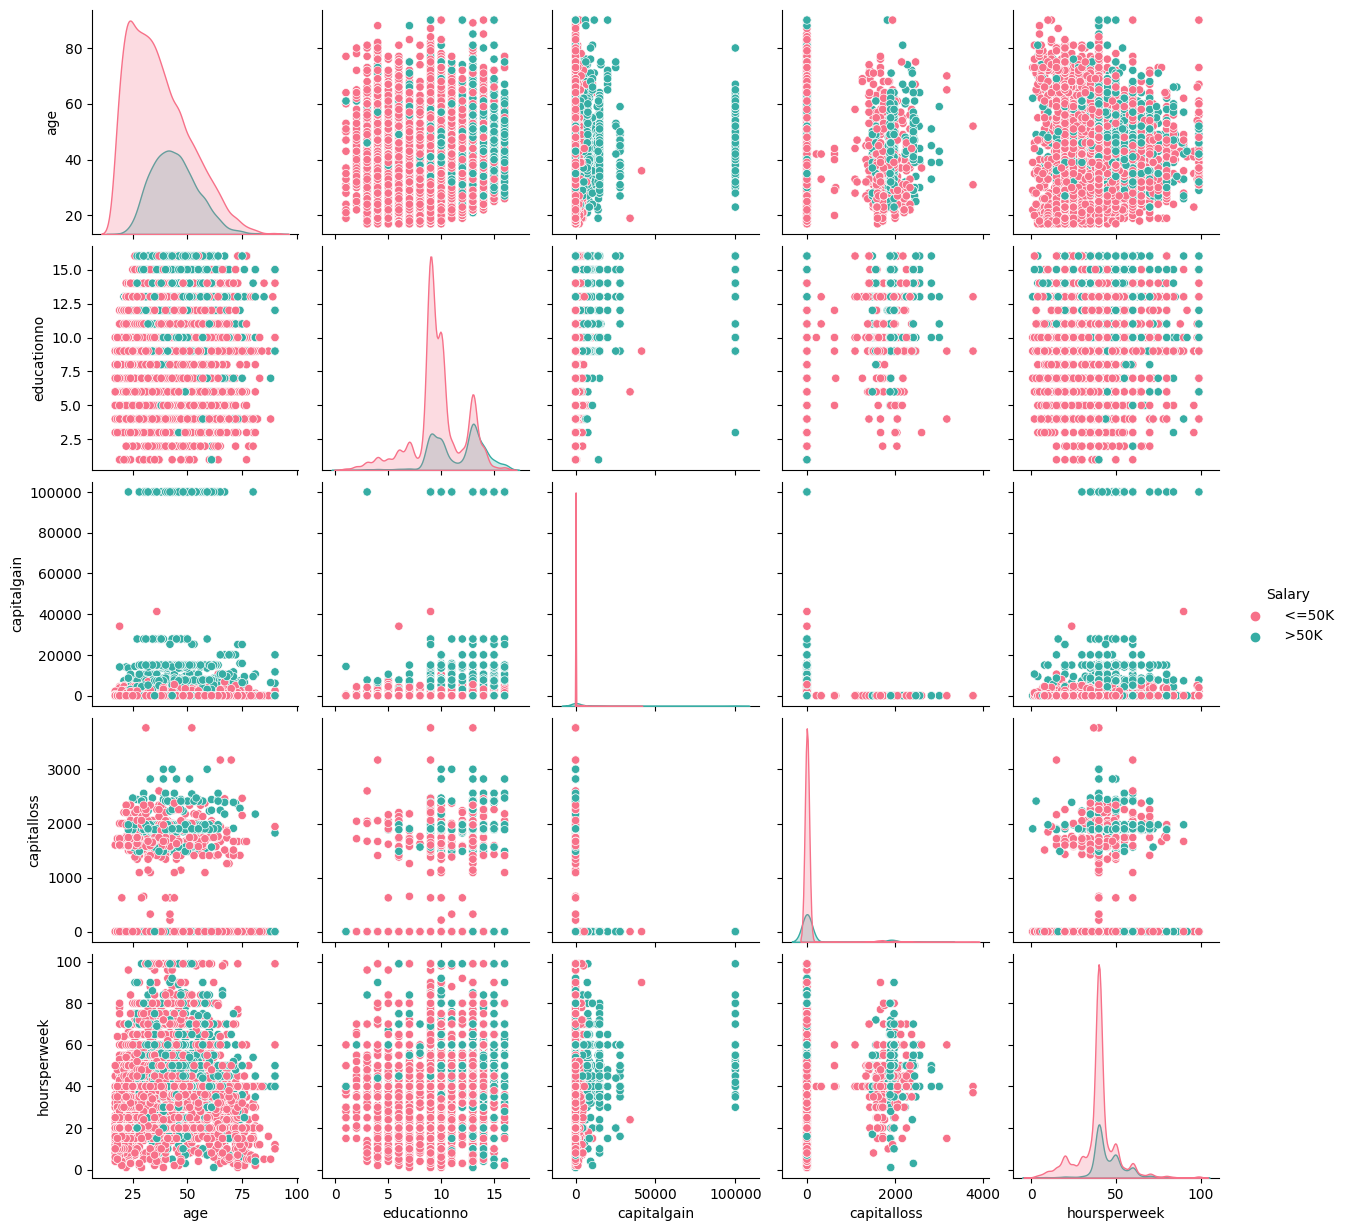

In [15]:
sns.pairplot(df,hue='Salary',palette='husl')

#### Distribution of continous variables are fair enough.

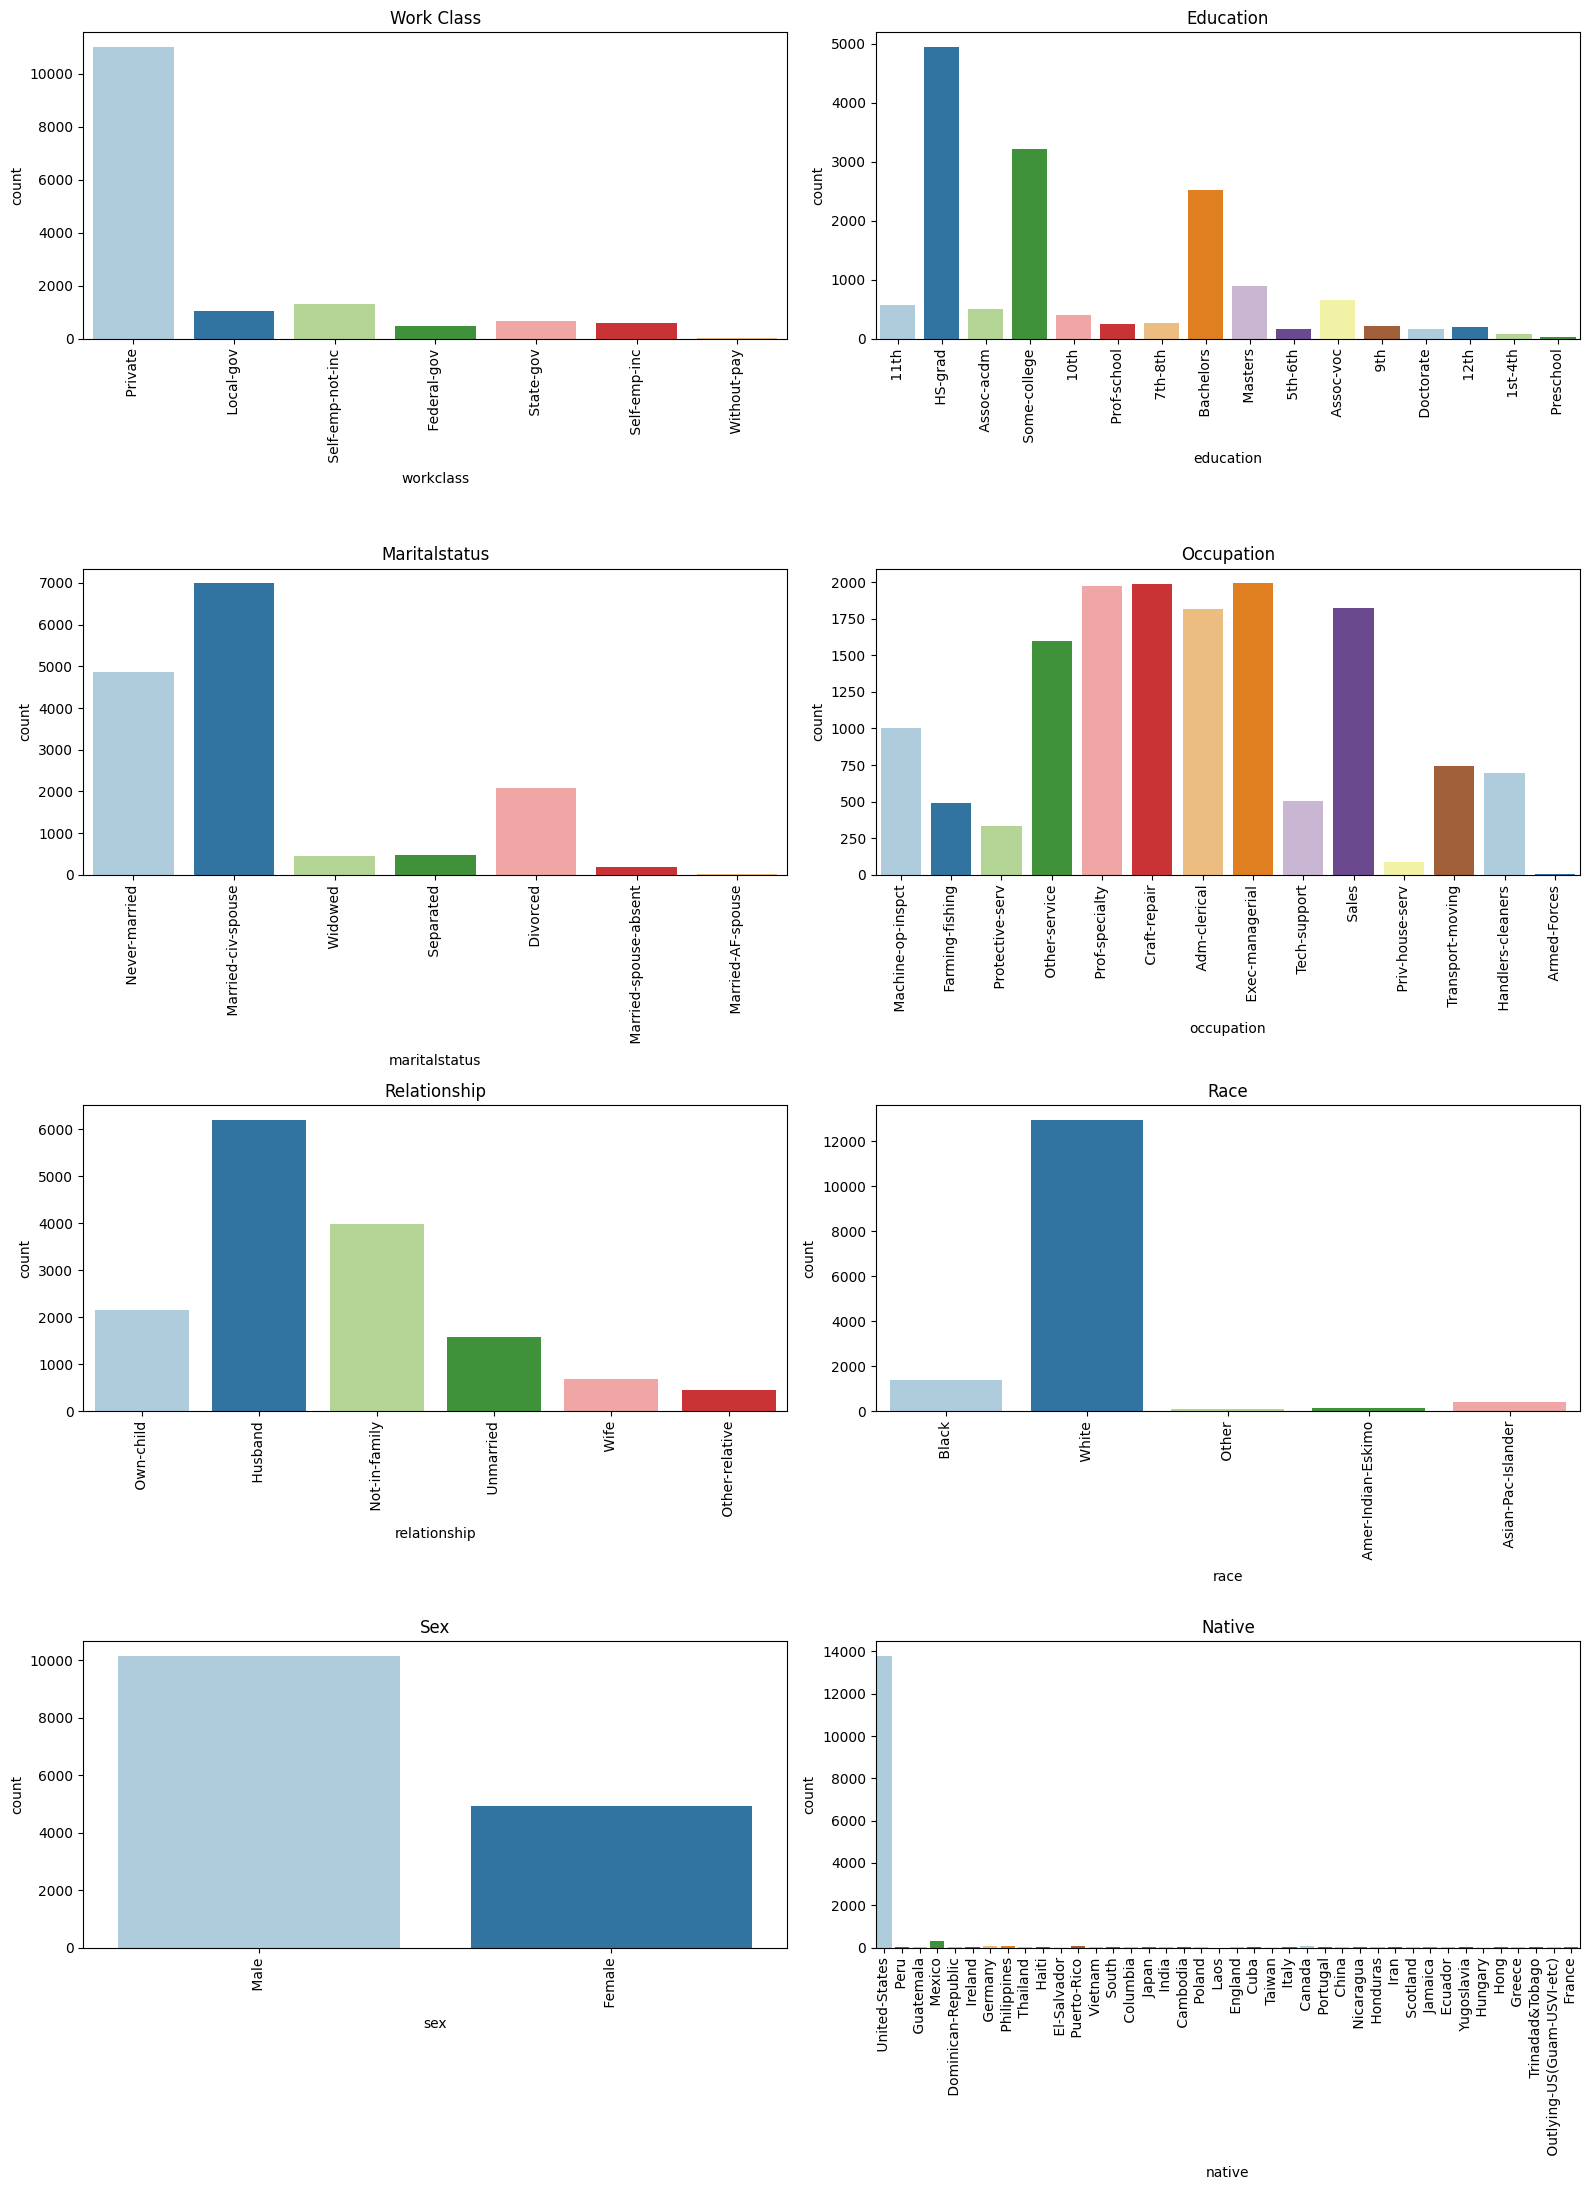

In [46]:
#Countplot of categorical variables
fig, ax=plt.subplots(figsize=(16,22),nrows=4,ncols=2)

sns.countplot(x='workclass',data=df,palette='Paired',ax=ax[0,0])
ax[0,0].set_title('Work Class')
ax[0,0].tick_params(axis='x',rotation=90)

sns.countplot(x='education',data=df,palette='Paired',ax=ax[0,1])
ax[0,1].set_title('Education')
ax[0,1].tick_params(axis='x',rotation=90)

sns.countplot(x='maritalstatus',data=df,palette='Paired',ax=ax[1,0])
ax[1,0].set_title('Maritalstatus')
ax[1,0].tick_params(axis='x',rotation=90)

sns.countplot(x='occupation',data=df,palette='Paired',ax=ax[1,1])
ax[1,1].set_title('Occupation')
ax[1,1].tick_params(axis='x',rotation=90)

sns.countplot(x='relationship',data=df,palette='Paired',ax=ax[2,0])
ax[2,0].set_title('Relationship')
ax[2,0].tick_params(axis='x',rotation=90)

sns.countplot(x='race',data=df,palette='Paired',ax=ax[2,1])
ax[2,1].set_title('Race')
ax[2,1].tick_params(axis='x',rotation=90)

sns.countplot(x='sex',data=df,palette='Paired',ax=ax[3,0])
ax[3,0].set_title('Sex')
ax[3,0].tick_params(axis='x',rotation=90)

sns.countplot(x='native',data=df,palette='Paired',ax=ax[3,1])
ax[3,1].set_title('Native')
ax[3,1].tick_params(axis='x',rotation=90)

plt.tight_layout()

#### Notes:  1. Majority of the employees is native to United States
####            2. More than 60% work class is Private
####            3. Around 60% Employees are Male

Text(0.5, 1.0, 'Salary')

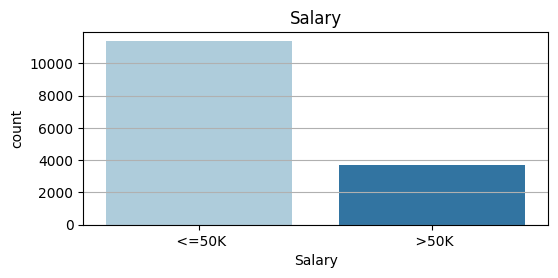

In [79]:
# Distribution of Target Variable (Salary)
plt.figure(figsize=(6,2.5))
plt.grid()
sns.countplot(x='Salary',data=df,palette='Paired')
plt.title('Salary')


#### Majority class : Salary <= 50K
#### Minority class : Salary > 50K

### Data Preprocessing

#### One-Hot-Encoding

In [80]:
# Lets encode our Categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
data=df.copy()
enc_data= pd.DataFrame(encoder.fit_transform(data[['workclass','education','maritalstatus','occupation','relationship','race','sex','native']]).toarray())

In [81]:
enc_data.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
data.drop(['workclass','education','maritalstatus','occupation','relationship','race','sex','native'],axis=1,inplace=True)

In [84]:
data=pd.concat([data,enc_data],axis=1)
data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,0,1,2,3,...,87,88,89,90,91,92,93,94,95,96
0,25,7,0,0,40,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,9,0,0,50,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,12,0,0,40,>50K,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,10,7688,0,40,>50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34,6,0,0,30,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Feature Scaling

In [88]:
#min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data['age']=scaler.fit_transform(data[['age']])
data['educationno']=scaler.fit_transform(data[['educationno']])
data['capitalgain']=scaler.fit_transform(data[['capitalgain']])
data['capitalloss']=scaler.fit_transform(data[['capitalloss']])
data['hoursperweek']=scaler.fit_transform(data[['hoursperweek']])

In [89]:
data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,0,1,2,3,...,87,88,89,90,91,92,93,94,95,96
0,0.109589,0.400000,0.000000,0.0,0.397959,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.533333,0.000000,0.0,0.500000,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.733333,0.000000,0.0,0.397959,>50K,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.600000,0.076881,0.0,0.397959,>50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.333333,0.000000,0.0,0.295918,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Split data into Target and Features

In [119]:
y=data.Salary #Target
X=data.drop('Salary',axis=1) #Feature
X.columns=X.columns.astype(str)
X.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,0,1,2,3,4,...,87,88,89,90,91,92,93,94,95,96
0,0.109589,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.333333,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [120]:
y


0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

### SVC Modelling

In [121]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as T_T_S

In [122]:
#Split data into train and test data
X_train,X_test,y_train,y_test=T_T_S(X,y,test_size=.2,random_state=1)

In [193]:
# SVC model
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X_train,y_train)

SVC()

#### Prediction and Evaluation

In [194]:
y_pred1=svc_rbf.predict(X_test)

In [195]:
from sklearn.metrics import confusion_matrix, classification_report

In [196]:
# Confusion Matrix
confusion_matrix(y_pred1,y_test)

array([[2109,  363],
       [ 175,  365]], dtype=int64)

In [197]:
pd.crosstab(y_pred1,y_test)

Salary,<=50K,>50K
row_0,,
<=50K,2109,363
>50K,175,365


In [199]:
#Classification report
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

       <=50K       0.92      0.85      0.89      2472
        >50K       0.50      0.68      0.58       540

    accuracy                           0.82      3012
   macro avg       0.71      0.76      0.73      3012
weighted avg       0.85      0.82      0.83      3012



#### We have less fitness measure for minority class. Lets try with some other kernels

#### kernel='linear'

In [201]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(X_train,y_train)
y_pred2=svc_linear.predict(X_test)

In [146]:
# Confusion Matrix
confusion_matrix(y_pred2,y_test)

array([[2105,  329],
       [ 179,  399]], dtype=int64)

In [202]:
pd.crosstab(y_pred2,y_test)

Salary,<=50K,>50K
row_0,,
<=50K,2105,329
>50K,179,399


In [203]:
#Classification report
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

       <=50K       0.92      0.86      0.89      2434
        >50K       0.55      0.69      0.61       578

    accuracy                           0.83      3012
   macro avg       0.73      0.78      0.75      3012
weighted avg       0.85      0.83      0.84      3012



#### Model performance for minority class is sligtly improved

#### kernel=polynomial

In [205]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(X_train,y_train)
y_pred3=svc_poly.predict(X_test)

In [206]:
# Confusion Matrix
confusion_matrix(y_pred3,y_test)

array([[2108,  350],
       [ 176,  378]], dtype=int64)

In [207]:
#Classification report
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

       <=50K       0.92      0.86      0.89      2458
        >50K       0.52      0.68      0.59       554

    accuracy                           0.83      3012
   macro avg       0.72      0.77      0.74      3012
weighted avg       0.85      0.83      0.83      3012



#### Performance remains same as previous model

#### kernel=sigmoid

In [208]:
svc_sigmoid=SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train,y_train)
y_pred4=svc_sigmoid.predict(X_test)

In [209]:
# Confusion Matrix
confusion_matrix(y_pred4,y_test)

array([[1983,  374],
       [ 301,  354]], dtype=int64)

In [210]:
#Classification report
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

       <=50K       0.87      0.84      0.85      2357
        >50K       0.49      0.54      0.51       655

    accuracy                           0.78      3012
   macro avg       0.68      0.69      0.68      3012
weighted avg       0.79      0.78      0.78      3012



#### Model performance is not impressive.
#### Lets do some hyperparameter tuning before we move for Bagging Technique

### Hyper Parameter Tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV
# svch=SVC()

# param_grid = { 'C': [0.1, 1], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto', 0.1, 1]}
# # C-->Regularization Parameter
# # kernel-->kernel function used for SVC model
# # gamma-->Coefficients of kernel
# grid_search=GridSearchCV(svch,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
# grid_search.fit(X_train,y_train)

####  RandomizedSearchCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV

svc_classifier = SVC()
# Define the hyperparameter distributions to sample from
param_distributions = {'C':[0.1,1],'kernel': ['linear', 'rbf'],'gamma': ['auto','scale',0.1,1] }
random_search = RandomizedSearchCV(svc_classifier, param_distributions, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1],
                                        'gamma': ['auto', 'scale', 0.1, 1],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

#### Best Model

In [179]:
best_model = random_search.best_estimator_
best_model

SVC(C=1, gamma=0.1, kernel='linear')

In [182]:
accuracy=print('accuracy =' ,best_model.score(X_test, y_test))

accuracy = 0.8313413014608234


In [183]:
svc_best=SVC(kernel='linear',gamma=0.1,C=1)
svc_best.fit(X_train,y_train)
y_pred_best=svc_best.predict(X_test)

In [184]:
#Confusion Matrix
confusion_matrix(y_pred_best,y_test)

array([[2105,  329],
       [ 179,  399]], dtype=int64)

In [185]:
#Classification Report
print(classification_report(y_pred_best,y_test))

              precision    recall  f1-score   support

       <=50K       0.92      0.86      0.89      2434
        >50K       0.55      0.69      0.61       578

    accuracy                           0.83      3012
   macro avg       0.73      0.78      0.75      3012
weighted avg       0.85      0.83      0.84      3012



#### **Same as model svc1. Lets try Bagging

### Bagging

In [225]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

svc_bag =SVC(kernel='linear',gamma=0.1,C=1)
# BaggingClassifier with SVC as the base model
bagging_classifier = BaggingClassifier(estimator=svc_bag, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(C=1, gamma=0.1, kernel='linear'),
                  random_state=42)

In [188]:
# Make predictions on the test set
y_pred_bag = bagging_classifier.predict(X_test)

In [190]:
#Confusion Matrix
confusion_matrix(y_pred_bag,y_test)

array([[2105,  339],
       [ 179,  389]], dtype=int64)

In [191]:
#Classification Report
print(classification_report(y_pred_bag,y_test))

              precision    recall  f1-score   support

       <=50K       0.92      0.86      0.89      2444
        >50K       0.53      0.68      0.60       568

    accuracy                           0.83      3012
   macro avg       0.73      0.77      0.75      3012
weighted avg       0.85      0.83      0.84      3012



#### No improvement in performance found with bagging Technique

#### Accuracy Table

In [217]:
pd.DataFrame({'Model':['svc_rbf','svc_linear','svc_poly','svc_sigmoid','svc_RCV','svc_bagging'],'Accuracy':[.82,.83,.83,.78,.83,.83]})

,Model,Accuracy
0,svc_rbf,0.82
1,svc_linear,0.83
2,svc_poly,0.83
3,svc_sigmoid,0.78
4,svc_RCV,0.83
5,svc_bagging,0.83


### Conclusion
#### Considering better accuracy and less complexity ,we can confirm svc_linear as our best model

In [218]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

       <=50K       0.92      0.86      0.89      2434
        >50K       0.55      0.69      0.61       578

    accuracy                           0.83      3012
   macro avg       0.73      0.78      0.75      3012
weighted avg       0.85      0.83      0.84      3012



### Learning Curve of the selected model

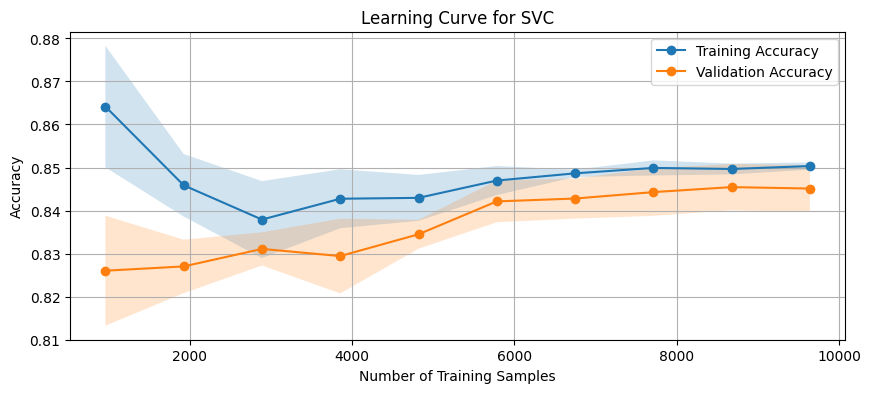

In [224]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
#import learningcurve
train_sizes, train_scores, valid_scores = learning_curve(svc_linear, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 4))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, valid_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVC')
plt.legend()
plt.grid()
plt.show();

#### Its been that the training tha vaidation accuracy converges and the change in accuracy is least and remains same for more than 5000 samples